<a href="https://colab.research.google.com/github/sjdoescoding/CE802-Assignment/blob/main/CE802_Additional_Comparative_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Additional Comparative Study

# Part A

In [24]:
# Upload the dataset

#Importing Libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns


# Uploading the Dataset

df = pd.read_csv("/content/CE802_P3_Data.csv")



# Exploratory Data Analysis

In [25]:
# Getting the size of the dataset
init_size = df.shape
print("The initial size of the data: {}".format(init_size), '\n')

# A look into the variables
print(df.columns)

The initial size of the data: (1500, 17) 

Index(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11',
       'F12', 'F13', 'F14', 'F15', 'F16', 'Target'],
      dtype='object')


In [26]:
# Initial look into the dataset
df.head(5)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,61.22,6,0.00,UK,-14.91,1030.95,614.70,-8.40,11.96,275.99,-333.60,1.86,19.48,6,Very high,7841.50,1605.31
1,86.58,12,20.07,Europe,0.57,1059.87,1354.00,-9.97,3.80,347.10,-356.04,6.39,22.15,2,Very low,25589.98,0.00
2,75.95,6,45.00,USA,-1.29,1320.03,1477.96,-10.02,20.32,345.69,-353.58,13.14,21.87,8,Low,16849.14,3241.77
3,156.57,12,12.93,USA,-4.83,1696.92,750.14,-10.98,4.78,253.37,-254.37,15.48,28.11,10,Very low,10791.06,0.00
4,101.27,3,0.51,Rest,-26.28,1451.37,251.06,-9.71,2.06,242.35,-379.77,3.90,23.84,10,Very low,14760.66,336.25


In [27]:
# Overlook of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
F1,1500.0,93.168033,29.857614,-25.55,73.120,93.215,114.0350,198.39
F2,1500.0,11.828000,5.430108,0.00,9.000,12.000,15.0000,30.00
F3,1500.0,190.808320,2322.462888,0.00,0.390,3.030,20.4150,82423.59
F5,1500.0,-6.788620,9.072751,-35.07,-13.140,-6.780,-0.4200,20.28
F6,1500.0,1376.728553,301.420683,350.68,1175.880,1373.145,1585.8025,2427.61
F7,1500.0,1092.897040,592.936195,-1035.56,682.885,1098.550,1498.1550,3081.12
F8,1500.0,-10.495153,3.040026,-20.20,-12.475,-10.600,-8.5400,-0.43
F9,1500.0,8.109187,5.812853,0.08,3.815,6.740,10.9450,45.14
F10,1500.0,274.393133,42.241393,83.89,253.320,274.455,294.3925,555.36
F11,1500.0,-345.797880,87.920436,-653.16,-403.890,-343.380,-286.8600,-76.74


In [28]:
# Checking for NaN values in DF
df.isnull().values.any()

False

In [29]:
# Checking if the target has any null values
(df['Target'] == 0).sum()

447

There are 447 values equal to 0, however, as this is the Target it will not be addressed.

There are no missing values in the Dataset.

In [30]:
# Checking datatypes
print(df.dtypes, '\n')

print('The number of datatypes for the features: ','\n', df.dtypes.value_counts())

F1        float64
F2          int64
F3        float64
F4         object
F5        float64
F6        float64
F7        float64
F8        float64
F9        float64
F10       float64
F11       float64
F12       float64
F13       float64
F14         int64
F15        object
F16       float64
Target    float64
dtype: object 

The number of datatypes for the features:  
 float64    13
int64       2
object      2
dtype: int64


From first look we can see that F4 and F15 are both objects/categorical data that needs to be transformed into numerical. This will be done through using one hot and ordinal encoders.

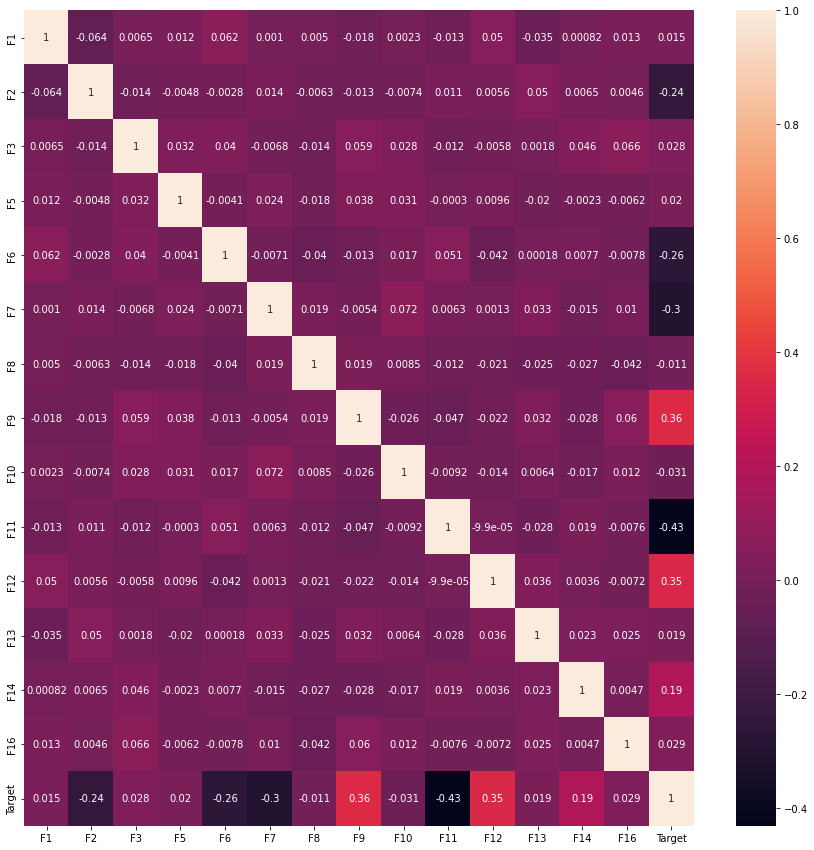

In [31]:
# Correlation heatmap of the features
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),cbar=True,annot=True)

Checking for outliers in the dataset.

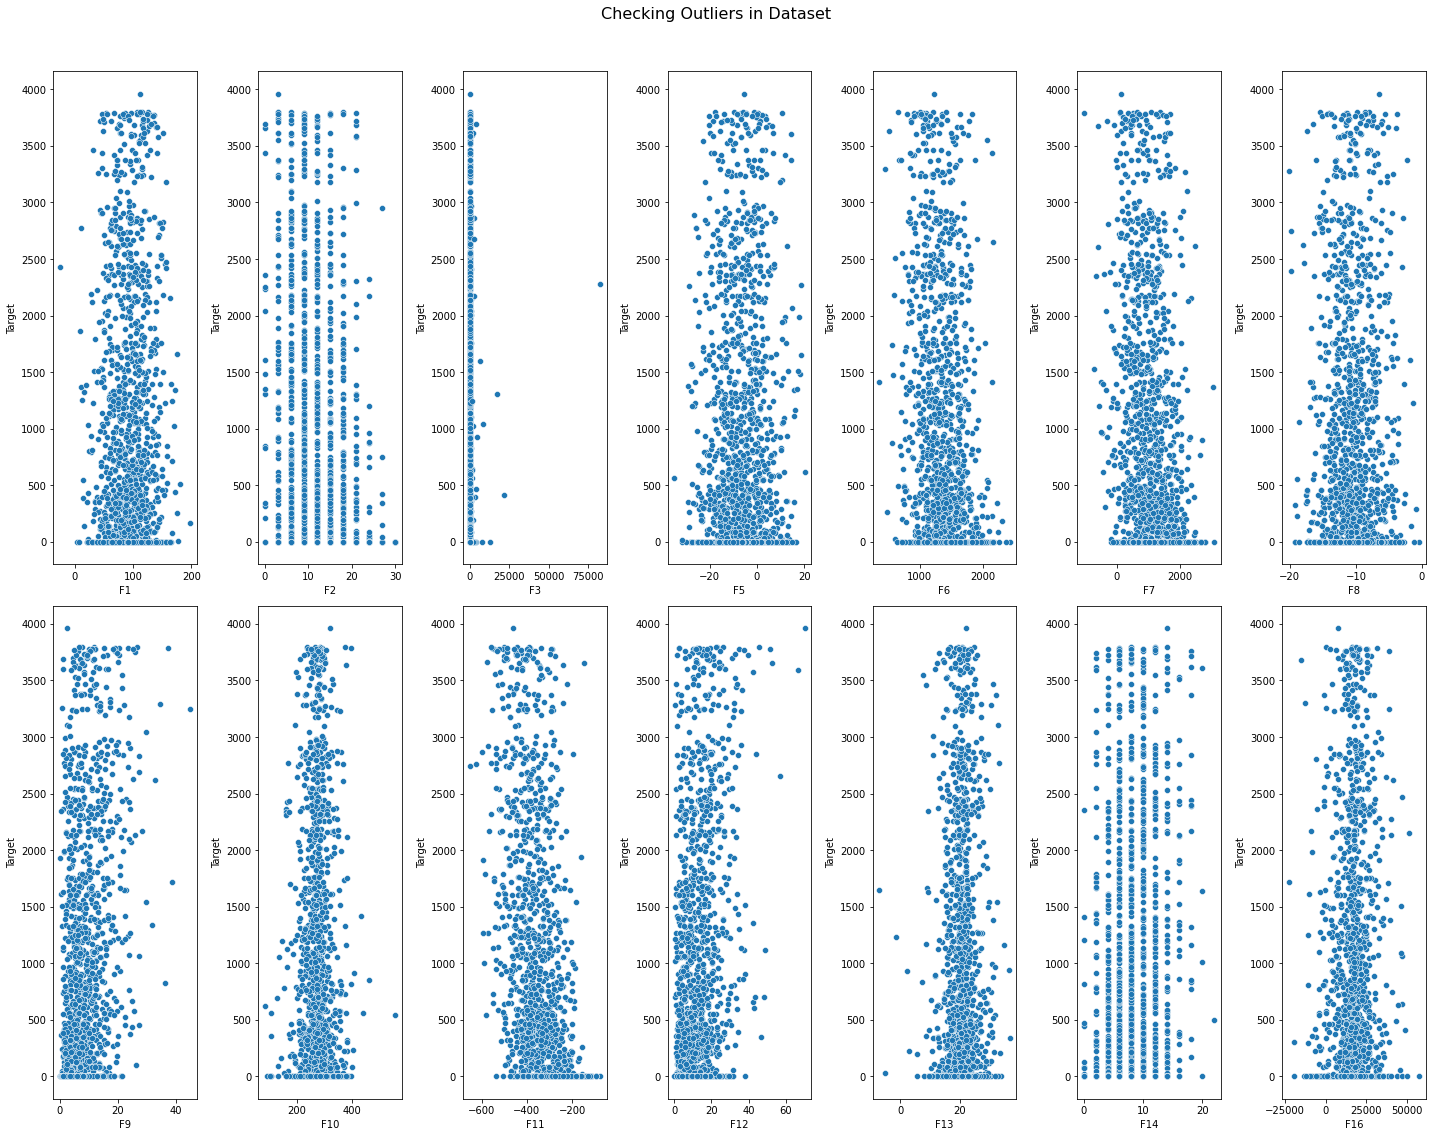

In [32]:
# Scatterplots to see outliers in the dataset
fig, axes = plt.subplots(2,7, figsize = (20,15))

fig.suptitle('Checking Outliers in Dataset', y=1.05, fontsize = 16)

# Drawing the scatterplots for each feature 
sns.scatterplot(ax=axes[0,0], data=df, x = 'F1', y = 'Target')

sns.scatterplot(ax=axes[0,1], data=df, x = 'F2', y = 'Target')

sns.scatterplot(ax=axes[0,2], data=df, x = 'F3', y = 'Target')

sns.scatterplot(ax=axes[0,3], data=df, x = 'F5', y = 'Target')

sns.scatterplot(ax=axes[0,4], data=df, x = 'F6', y = 'Target')

sns.scatterplot(ax=axes[0,5], data=df, x = 'F7', y = 'Target')

sns.scatterplot(ax=axes[0,6], data=df, x = 'F8', y = 'Target' )

sns.scatterplot(ax=axes[1,0], data=df, x = 'F9', y = 'Target')

sns.scatterplot(ax=axes[1,1], data=df, x = 'F10', y = 'Target')

sns.scatterplot(ax=axes[1,2], data=df, x = 'F11', y = 'Target')

sns.scatterplot(ax=axes[1,3], data=df, x = 'F12', y = 'Target')

sns.scatterplot(ax=axes[1,4], data=df, x = 'F13', y = 'Target')

sns.scatterplot(ax=axes[1,5], data=df, x = 'F14', y = 'Target')

sns.scatterplot(ax=axes[1,6], data=df, x = 'F16', y = 'Target')

# Feature F15 and F4 have not been included as they're categorical data

fig.tight_layout()
plt.show()

# Feature Engineering / Preprocessing

A deeper look into the categorical features in data set

In [33]:
# Breakdown of Categorical F15 Data in Dataset
print(pd.get_dummies(df.F15))


      High  Low  Medium  Very high  Very low
0        0    0       0          1         0
1        0    0       0          0         1
2        0    1       0          0         0
3        0    0       0          0         1
4        0    0       0          0         1
...    ...  ...     ...        ...       ...
1495     0    0       0          1         0
1496     0    0       0          1         0
1497     0    0       0          1         0
1498     0    1       0          0         0
1499     0    0       0          0         1

[1500 rows x 5 columns]


In [34]:
# Distribution of Categorical data
print(df.F15.value_counts())


Very low     312
Low          310
High         301
Very high    290
Medium       287
Name: F15, dtype: int64


Performing ordinal encoding on the categorical data.

In [35]:
# Oridnal Encoding F15 data
from sklearn.preprocessing import OrdinalEncoder

# Assigning Categories
oe = OrdinalEncoder(categories=[['Very low', 'Low','Medium','High','Very high']])

# Reshape the column into 1d array and tansform values
df['F15'] = oe.fit_transform(df['F15'].values.reshape(-1,1))

# Check that the F15 column has been transformed into numerical
df['F15']

0       4.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
1495    4.0
1496    4.0
1497    4.0
1498    1.0
1499    0.0
Name: F15, Length: 1500, dtype: float64

In [36]:
df['F15'].describe().T

count    1500.000000
mean        1.964667
std         1.418718
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: F15, dtype: float64

Removing the F4 feature as it is not necessary for predicting the optimal quantity of a drug.

In [37]:
# Dropping the F4 feature
df = df.drop('F4', axis = 1)

df.columns

Index(['F1', 'F2', 'F3', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12',
       'F13', 'F14', 'F15', 'F16', 'Target'],
      dtype='object')

The F15 & F4 feature can now be measured in the dataset has it has been converted from catergorical feature to numerical and therefore produce a better accuracy.

In [38]:
df.head(5)

,F1,F2,F3,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,61.22,6,0.00,-14.91,1030.95,614.70,-8.40,11.96,275.99,-333.60,1.86,19.48,6,4.0,7841.50,1605.31
1,86.58,12,20.07,0.57,1059.87,1354.00,-9.97,3.80,347.10,-356.04,6.39,22.15,2,0.0,25589.98,0.00
2,75.95,6,45.00,-1.29,1320.03,1477.96,-10.02,20.32,345.69,-353.58,13.14,21.87,8,1.0,16849.14,3241.77
3,156.57,12,12.93,-4.83,1696.92,750.14,-10.98,4.78,253.37,-254.37,15.48,28.11,10,0.0,10791.06,0.00
4,101.27,3,0.51,-26.28,1451.37,251.06,-9.71,2.06,242.35,-379.77,3.90,23.84,10,0.0,14760.66,336.25


In [39]:
# Looking at the size of the data for modelling
df.shape

(1500, 16)

# Prediction


In [40]:
# Importing ML models & Evaluators
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [41]:
# Assigning X and y values, dropping the 'Target' as it will not help for prediction on the test set.
X = df.drop('Target', axis = 1).values
y = df['Target'].values.reshape(-1,1)

# Scaling the dataset
standardScale = StandardScaler()
standardScale.fit_transform(X)

# Splitting the Data into Train and Test sets - 80:20 Split on the training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state = 1)

# GridSearch Hyper Tuning Parameters

In [42]:
# GridsearchCV on Linear Regression
params1 = {'fit_intercept':('True','False')}
grid = GridSearchCV(LinearRegression(), params1)
grid.fit(X,y)
grid.best_params_

{'fit_intercept': 'True'}

In [43]:
# GridsearchCV on Ridge Regression
params2 = {'solver':('auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'), 'alpha' : [0.5,1,2]}
grid = GridSearchCV(Ridge(), params2)
grid.fit(X,y)
grid.best_params_

{'alpha': 2, 'solver': 'auto'}

In [44]:
# GridSearchCV on Random Forest Regression

# Ravel y for gridsearch testing
y_rav = y.ravel()
params3 = {'n_estimators' : [10,100]}
grid = GridSearchCV(RandomForestRegressor(), params3)
grid.fit(X,y_rav)
grid.best_params_

{'n_estimators': 100}

# Linear Regression

In [45]:
# Cross Validation for Linear Regression
reg = LinearRegression(fit_intercept = True)

scores = cross_val_score(reg, X,y, cv=5)

print("Linear Regression Cross-validation ", scores)

print("Mean 5-Fold Accuracy: %0.2f \nVariance: (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Linear Regression Cross-validation  [0.70534533 0.68532366 0.71513816 0.68416943 0.65508533]
Mean 5-Fold Accuracy: 0.69 
Variance: (+/- 0.04)


In [46]:
# Prediction for Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Prediction
lr_y_pred = lin_reg.predict(X_test)

# Prediction Score
lr_test_score = lin_reg.score(X_test, y_test)
print('Prediction score: {:.2f}'.format(lr_test_score))

#RMSE
mse = mean_squared_error(y_test, lr_y_pred)
print("R2 score : %.2f" % r2_score(y_test,lr_y_pred))

# print(mse)
print('The mean squared error of Linear Regression model is: {:.3f}'.format(mse))

Prediction score: 0.70
R2 score : 0.70
The mean squared error of Linear Regression model is: 371251.925


# Ridge Regression


In [47]:
# Cross Validation for Ridge Regression
ridge = Ridge(alpha = 2)

scores = cross_val_score(ridge, X,y, cv=5)

print("Ridge Regression Cross-Validation ", scores)

print("Mean 5-Fold Accuracy: %0.2f \nVariance: (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Ridge Regression Cross-Validation  [0.70534464 0.68531909 0.71512797 0.68417138 0.65512065]
Mean 5-Fold Accuracy: 0.69 
Variance: (+/- 0.04)


In [48]:
# Prediction for Ridge Regression
ridge_reg = Ridge(alpha = 2)
ridge_reg.fit(X_train, y_train)

# Prediction
y_pred = ridge_reg.predict(X_test)

# Prediction Score
ridge_test_score = ridge_reg.score(X_test, y_test)
print('Prediction score: {:.2f}'.format(ridge_test_score))

#RMSE
mse = mean_squared_error(y_test, y_pred)
print("R2 score : %.2f" % r2_score(y_test,y_pred))

# print(mse)
print('The mean squared error of Linear Regression model is: {:.3f}'.format(mse))

Prediction score: 0.70
R2 score : 0.70
The mean squared error of Linear Regression model is: 371284.708


# Random Forest Regression

In [57]:
# Random Forest Regressor Cross Validation
rand_forest = RandomForestRegressor(n_estimators = 100)

scores = cross_val_score(rand_forest, X, y.ravel(), cv = 5)

print("Random Forest Refression Cross Validation: ", scores)

print("Mean 5-Fold Accuracy: %0.2f \nVariance: (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Random Forest Refression Cross Validation:  [0.60433371 0.53734503 0.5556208  0.58607866 0.62276896]
Mean 5-Fold Accuracy: 0.58 
Variance: (+/- 0.06)


In [58]:
# Prediction for Random Forest Regrssion
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)

# Prediction
y_pred = rf.predict(X_test)

# Prediction Score
rf_test_score = rf.score(X_test, y_test)
print('Prediction score: {:.2f}'.format(rf_test_score))

#RMSE
mse = mean_squared_error(y_test, y_pred)
print("R2 score : %.2f" % r2_score(y_test,y_pred))

# print(mse)
print('The mean squared error of Linear Regression model is: {:.3f}'.format(mse))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Prediction score: 0.54
R2 score : 0.54
The mean squared error of Linear Regression model is: 562692.557


# Summary of Additional Comparative Study Results
**Linear Regression:**
* Prediction: 70%
* RMSE: 371251.925

**Ridge Regression:** 
* Prediction: 70%
* RMSE: 371268.313

**Random Forest Regression:**
* Prediction: 54%
* RMSE: 565494.503

From the results of the Additional Comparative study we can see that Linear Regression performed as the best model when applied to the dataset. Ridge Regression possessed a similar accuracy, however, the Root Mean Squared Error of the Linear Regression was slightly lower than Ridge Regression.

Random Forest Regression performed the worst, with just a 54% accuracy, and a much higher RMSE than both Linear and Ridge Regression.


# Prediction on hold-out test Set

In [51]:
# Uploading the dataset
df_test = pd.read_csv("/content/CE802_P3_Test.csv")

# Removing the 'F4' Feature
df2 = df_test.drop('F4', axis = 1)


df2.head()


,F1,F2,F3,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,154.97,9,0.57,-14.34,1286.94,1913.38,-10.54,6.66,232.40,-440.10,12.51,22.99,4,Low,22482.82,NaN
1,78.99,6,2.31,-16.17,1522.99,1458.10,-12.17,4.96,268.26,-328.74,21.03,20.80,12,High,17183.76,NaN
2,115.81,6,0.24,6.84,979.23,1427.52,-11.22,4.74,233.43,-404.07,1.17,21.42,6,Very high,17585.36,NaN
3,48.99,9,1023.63,-12.75,1052.18,605.80,-9.75,11.46,261.27,-506.25,3.99,19.64,4,High,14621.10,NaN
4,71.39,6,1.68,-10.98,1235.64,-208.92,-11.45,12.76,332.18,-196.89,25.35,19.50,8,Medium,14624.56,NaN


In [52]:
# Using Ordinal Encoder on the F15 Feature

# Assigning Categories
oe = OrdinalEncoder(categories=[['Very low', 'Low','Medium','High','Very high']])

# Reshape the column into 1d array and tansform values
df2['F15'] = oe.fit_transform(df2['F15'].values.reshape(-1,1))

# Check that the F15 column has been transformed into numerical
df2['F15']

0       1.0
1       3.0
2       4.0
3       3.0
4       2.0
       ... 
1495    4.0
1496    2.0
1497    0.0
1498    1.0
1499    0.0
Name: F15, Length: 1500, dtype: float64

In [53]:
# Assigning X and y values, dropping the 'Target' as it will not help for prediction on the new test set.
X2 = df2.drop('Target', axis = 1).to_numpy()

# Scaling the new dataset
standardScale = StandardScaler()
standardScale.fit_transform(X2)

array([[ 2.0834168 , -0.5743705 , -0.08247738, ..., -1.08914967,
        -0.69098598,  0.74898417],
       [-0.46243416, -1.13093106, -0.08195989, ...,  1.10156371,
         0.70682787,  0.09835703],
       [ 0.7712883 , -1.13093106, -0.08257552, ..., -0.54147132,
         1.4057348 ,  0.14766612],
       ...,
       [-0.10223545, -1.13093106, -0.07812337, ...,  0.55388536,
        -1.38989291, -0.10280346],
       [-0.77605833,  2.20843231, -0.08260229, ...,  0.55388536,
        -0.69098598,  0.35207787],
       [-0.83301999, -0.01780994, -0.08130858, ..., -1.08914967,
        -1.38989291, -0.20705978]])

The test set is now ready to perform prediction on.

In [54]:
# Prediction on Test set using trained Linear Regression model#

lr_y_pred2 = lin_reg.predict(X2)

# Checking that prediction has worked
print(lr_y_pred2)

# Converting the test set to a dataframe and adding a 'Class' label to the former test set
df3 = pd.DataFrame(df2)
df3['Target'] = lr_y_pred2

df3

[[  691.62110115]
 [ 1353.66604917]
 [ 1139.70395228]
 ...
 [  513.60449931]
 [-1311.35117647]
 [  377.41382261]]


,F1,F2,F3,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,154.97,9,0.57,-14.34,1286.94,1913.38,-10.54,6.66,232.40,-440.10,12.51,22.99,4,1.0,22482.82,691.621101
1,78.99,6,2.31,-16.17,1522.99,1458.10,-12.17,4.96,268.26,-328.74,21.03,20.80,12,3.0,17183.76,1353.666049
2,115.81,6,0.24,6.84,979.23,1427.52,-11.22,4.74,233.43,-404.07,1.17,21.42,6,4.0,17585.36,1139.703952
3,48.99,9,1023.63,-12.75,1052.18,605.80,-9.75,11.46,261.27,-506.25,3.99,19.64,4,3.0,14621.10,2192.815286
4,71.39,6,1.68,-10.98,1235.64,-208.92,-11.45,12.76,332.18,-196.89,25.35,19.50,8,2.0,14624.56,2156.238291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,58.13,12,22.05,2.13,1014.70,567.18,-11.91,2.58,266.94,-181.02,12.93,12.35,8,4.0,17222.30,724.453987
1496,135.11,18,10.14,2.61,390.34,1181.84,-12.15,11.80,224.01,-272.79,9.15,22.21,6,2.0,19004.04,1087.213466
1497,89.74,6,15.21,-23.97,1745.60,1240.02,-5.13,1.68,272.01,-331.17,21.99,20.91,10,0.0,15545.40,513.604499
1498,69.63,24,0.15,-2.28,1764.78,1448.96,-13.66,3.24,197.32,-243.57,2.67,17.72,10,1.0,19250.20,-1311.351176


In [55]:
# Creating new CSV
df3.to_csv('CE802_P3_Test2.csv')